In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

## 1. Data Preparation:

In [2]:
df = pd.read_csv('heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


## 2. Exploratory Data Analysis (EDA):

In [3]:
df.shape

(908, 13)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [7]:
# Check for missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
## Replace nulls with the mean of the column.
df['oldpeak'].fillna(df['oldpeak'].mean(), inplace=True)

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

## Visualize distributions:

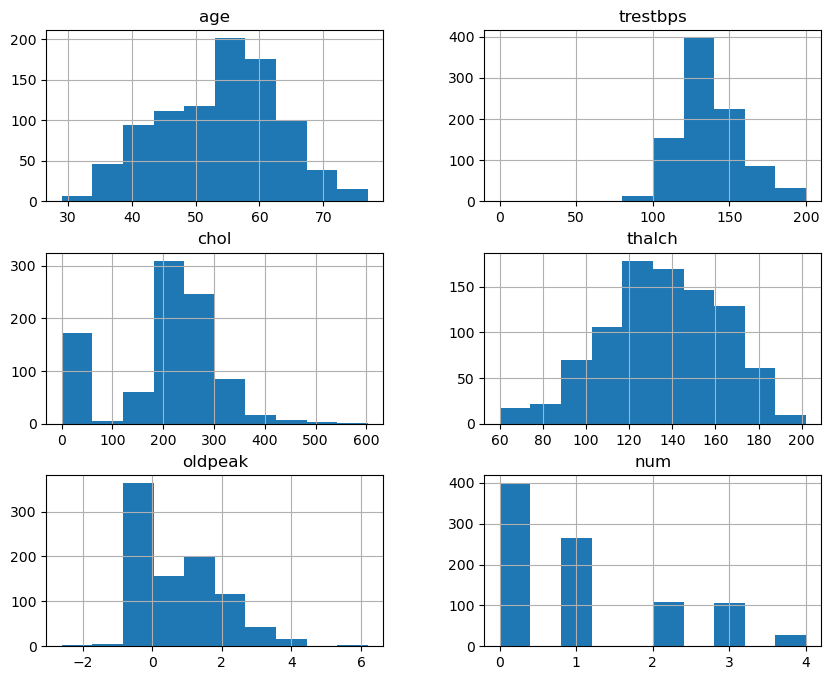

In [11]:
## Histogram:
df.hist(figsize=(10, 8));

<Axes: >

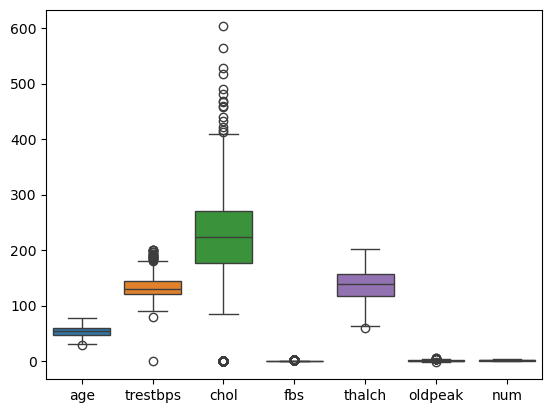

In [12]:
# Box plots
sns.boxplot(data=df)

In [13]:
## outlier_capping:
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

<Axes: >

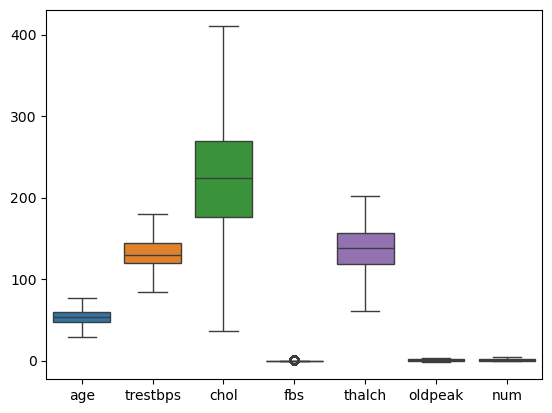

In [14]:
# Box plots
sns.boxplot(data=df)

## 3. Feature Engineering:

#### Encode Categorical Variables

### Use Label Encoding or One-Hot Encoding

In [15]:
df.dtypes  # Look for columns with dtype 'object'

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [16]:
# Encode categorical variables:
df = pd.get_dummies(df, drop_first=True)
df

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_TRUE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63.0,145.0,233.000,True,150.0,2.300000,0,True,False,False,True,False,False,False,False,False,False,False,False
1,41.0,135.0,203.000,False,132.0,0.000000,0,True,True,False,False,True,False,False,False,True,False,False,False
2,57.0,140.0,192.000,False,148.0,0.400000,0,True,False,False,False,True,False,False,False,True,False,False,False
3,52.0,118.0,186.000,False,190.0,0.000000,0,True,False,False,True,False,False,False,False,True,False,False,False
4,57.0,110.0,201.000,False,126.0,1.500000,0,True,False,False,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53.0,125.0,36.875,False,120.0,1.500000,4,True,False,False,False,True,False,False,False,False,True,False,False
904,62.0,166.0,170.000,False,120.0,3.000000,4,True,False,False,False,False,True,True,False,True,False,False,False
905,56.0,170.0,36.875,False,123.0,2.500000,4,True,False,True,False,False,False,True,False,False,False,False,True
906,56.0,144.0,208.000,True,105.0,0.891253,4,True,False,True,False,False,True,False,True,False,False,False,False


In [17]:
# Scale numerical features (if necessary):
scaler = StandardScaler()
scaler

StandardScaler()

In [18]:
scaled_features = scaler.fit_transform(df)
scaled_features

array([[ 1.00610375,  0.60741674,  0.2648453 , ..., -0.69894534,
        -0.7628116 , -0.80865086],
       [-1.39777497,  0.08900862, -0.04500608, ..., -0.69894534,
        -0.7628116 , -0.80865086],
       [ 0.35050046,  0.34821268, -0.15861826, ..., -0.69894534,
        -0.7628116 , -0.80865086],
       ...,
       [ 0.24123325,  1.90343705, -1.76080809, ..., -0.69894534,
        -0.7628116 ,  1.23662764],
       [ 0.24123325,  0.55557593,  0.00663581, ..., -0.69894534,
        -0.7628116 , -0.80865086],
       [ 0.35050046,  0.45189431,  0.71929398, ..., -0.69894534,
         1.31093969, -0.80865086]])

In [19]:
# Handle missing values
df.fillna(df.median(), inplace=True)

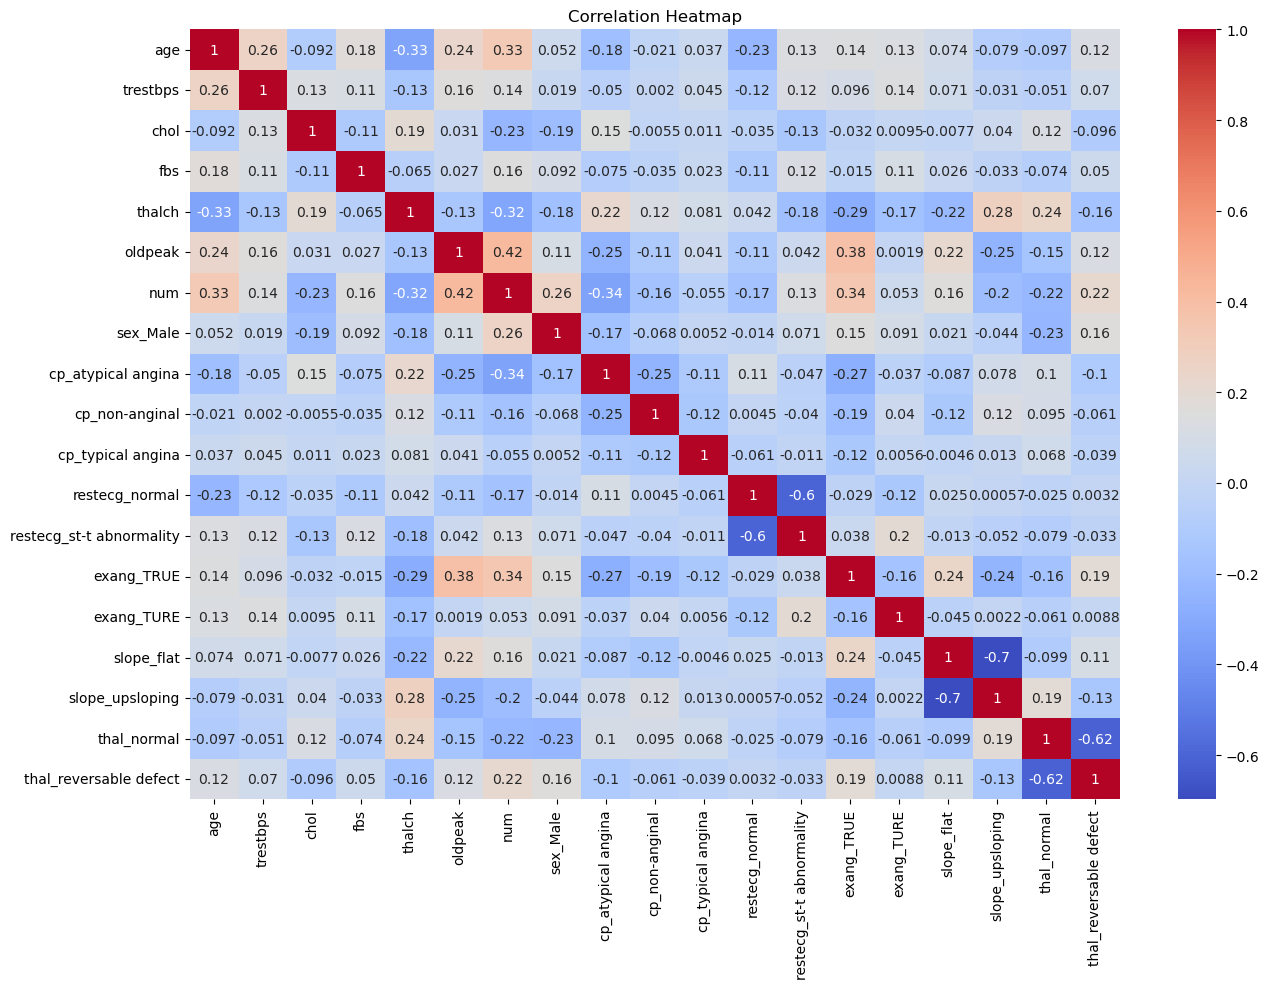

In [20]:
# Correlation matrix:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 4. Decision Tree Classification:

In [21]:
# Split the dataset:
target = df['age']
features = df.drop(columns='age')
features.head()

,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_TRUE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,145.0,233.0,True,150.0,2.3,0,True,False,False,True,False,False,False,False,False,False,False,False
1,135.0,203.0,False,132.0,0.0,0,True,True,False,False,True,False,False,False,True,False,False,False
2,140.0,192.0,False,148.0,0.4,0,True,False,False,False,True,False,False,False,True,False,False,False
3,118.0,186.0,False,190.0,0.0,0,True,False,False,True,False,False,False,False,True,False,False,False
4,110.0,201.0,False,126.0,1.5,0,True,False,False,False,True,False,True,False,True,False,False,False


In [22]:
target.head()

0    63.0
1    41.0
2    57.0
3    52.0
4    57.0
Name: age, dtype: float64

In [23]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.80,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(726, 18)
(182, 18)
(726,)
(182,)


In [24]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)

In [25]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
y_pred=dec_tree.predict(x_test)
y_pred

array([41., 54., 58., 52., 52., 41., 41., 52., 58., 58., 52., 58., 54.,
       54., 54., 54., 41., 52., 61., 54., 41., 41., 58., 54., 41., 58.,
       52., 58., 58., 58., 41., 52., 41., 52., 52., 61., 52., 54., 52.,
       41., 41., 41., 58., 58., 52., 58., 54., 58., 54., 52., 54., 54.,
       58., 52., 58., 54., 52., 55., 52., 54., 52., 52., 54., 41., 52.,
       41., 58., 54., 54., 41., 41., 52., 54., 41., 41., 61., 58., 61.,
       55., 54., 54., 58., 52., 54., 52., 54., 61., 58., 54., 54., 54.,
       54., 61., 54., 58., 54., 54., 52., 54., 55., 41., 52., 52., 58.,
       61., 58., 54., 58., 58., 58., 52., 54., 58., 41., 54., 58., 61.,
       54., 54., 54., 58., 52., 52., 41., 61., 52., 54., 52., 58., 55.,
       58., 58., 58., 52., 52., 58., 41., 54., 54., 54., 58., 58., 54.,
       58., 58., 52., 41., 54., 54., 54., 52., 52., 52., 54., 54., 52.,
       61., 52., 52., 61., 54., 58., 52., 52., 54., 41., 52., 61., 41.,
       54., 54., 54., 58., 41., 54., 52., 54., 41., 61., 54., 58

In [27]:
target

0      63.0
1      41.0
2      57.0
3      52.0
4      57.0
       ... 
903    53.0
904    62.0
905    56.0
906    56.0
907    57.0
Name: age, Length: 908, dtype: float64

In [28]:
y_pred = dec_tree.predict(x_test) 

In [29]:
y_test = y_test.astype(int)

In [30]:
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         4
          39       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         2
          41       0.04      0.33      0.07         3
          42       0.00      0.00      0.00         3
          43       0.00      0.00      0.00         2
          44       0.00      0.00      0.00         6
          45       0.00      0.00      0.00         5
          46       0.00      0.00      0.00         7
          47       0.00      0.00      0.00         7
          48       0.00      0.00      0.00         3
          49       0.00      0.00      0.00         5
          50       0.00    

In [31]:
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
roc_auc_score=(y_test, dec_tree.predict_proba(x_test)[:, 1])
roc_auc_score

(106    63
 24     58
 487    54
 399    69
 873    74
        ..
 358    49
 447    58
 56     60
 412    70
 537    52
 Name: age, Length: 182, dtype: int32,
 array([0.        , 0.        , 0.        , 0.00568182, 0.00568182,
        0.        , 0.        , 0.00568182, 0.        , 0.        ,
        0.00568182, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00568182, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00568182, 0.        , 0.        , 0.        ,
        0.        , 0.00568182, 0.        , 0.00568182, 0.00568182,
        0.        , 0.00568182, 0.        , 0.00568182, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00568182,
        0.        , 0.        , 0.        , 0.        , 0.00568182,
        0.        , 0.        , 0.        , 0.00568182, 0.        ,
        0.        , 0.00568182, 0.        , 0.00568182, 0.        ,
        0.00568182, 0.00

### 5. Hyperparameter Tuning:

In [33]:
# Use GridSearchCV or RandomizedSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}

In [34]:
param_grid

{'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'criterion': ['gini', 'entropy']}

In [35]:
grid_search 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]})

In [36]:
# Retrain with best parameters
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [37]:
y_pred=dec_tree.predict(x_test)
accuracy_score(y_test,y_pred)

0.04945054945054945

### 6. Model Evaluation and Analysis

In [38]:
# Analyse performance metrics
y_best_pred = best_model.predict(x_test)
y_best_pred

array([52., 59., 60., 48., 66., 51., 37., 60., 45., 57., 55., 50., 48.,
       41., 41., 37., 56., 43., 58., 39., 48., 45., 62., 54., 39., 69.,
       52., 63., 67., 69., 57., 52., 41., 38., 49., 61., 47., 51., 48.,
       44., 59., 49., 69., 63., 38., 48., 76., 61., 43., 44., 42., 44.,
       56., 36., 62., 43., 59., 58., 36., 51., 48., 57., 49., 45., 56.,
       49., 61., 35., 41., 52., 35., 53., 38., 42., 52., 38., 58., 64.,
       55., 55., 37., 69., 52., 76., 36., 63., 51., 60., 37., 50., 54.,
       60., 47., 54., 55., 41., 62., 54., 45., 62., 55., 54., 52., 59.,
       52., 56., 54., 59., 55., 45., 33., 52., 63., 43., 59., 34., 55.,
       53., 72., 51., 57., 51., 50., 49., 51., 65., 39., 54., 61., 55.,
       63., 65., 65., 36., 43., 54., 41., 43., 53., 37., 45., 44., 51.,
       60., 69., 59., 41., 57., 60., 37., 66., 51., 46., 71., 57., 56.,
       47., 38., 60., 57., 41., 63., 59., 58., 58., 37., 50., 61., 42.,
       44., 42., 69., 57., 52., 54., 49., 52., 38., 55., 56., 52

In [39]:
classification_report(y_test, y_best_pred)

'              precision    recall  f1-score   support\n\n        29.0       0.00      0.00      0.00         1\n        30.0       0.00      0.00      0.00         1\n        31.0       0.00      0.00      0.00         2\n        33.0       0.00      0.00      0.00         0\n        34.0       0.00      0.00      0.00         1\n        35.0       0.00      0.00      0.00         0\n        36.0       0.00      0.00      0.00         0\n        37.0       0.00      0.00      0.00         2\n        38.0       0.00      0.00      0.00         4\n        39.0       0.00      0.00      0.00         2\n        40.0       0.00      0.00      0.00         2\n        41.0       0.00      0.00      0.00         3\n        42.0       0.00      0.00      0.00         3\n        43.0       0.00      0.00      0.00         2\n        44.0       0.00      0.00      0.00         6\n        45.0       0.00      0.00      0.00         5\n        46.0       0.00      0.00      0.00         7\n       

In [40]:
# Visualize the decision tree structure:
print(export_text(best_model, feature_names=list(features.columns)))

|--- restecg_normal <= 0.50
|   |--- num <= 0.50
|   |   |--- cp_atypical angina <= 0.50
|   |   |   |--- thalch <= 139.00
|   |   |   |   |--- chol <= 212.00
|   |   |   |   |   |--- oldpeak <= 0.45
|   |   |   |   |   |   |--- thalch <= 122.50
|   |   |   |   |   |   |   |--- thalch <= 105.50
|   |   |   |   |   |   |   |   |--- class: 57.0
|   |   |   |   |   |   |   |--- thalch >  105.50
|   |   |   |   |   |   |   |   |--- exang_TRUE <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 41.0
|   |   |   |   |   |   |   |   |--- exang_TRUE >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 60.0
|   |   |   |   |   |   |--- thalch >  122.50
|   |   |   |   |   |   |   |--- thalch <= 131.00
|   |   |   |   |   |   |   |   |--- class: 44.0
|   |   |   |   |   |   |   |--- thalch >  131.00
|   |   |   |   |   |   |   |   |--- thal_reversable defect <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 49.0
|   |   |   |   |   |   |   |   |--- thal_reversable defect >  0.50
|  

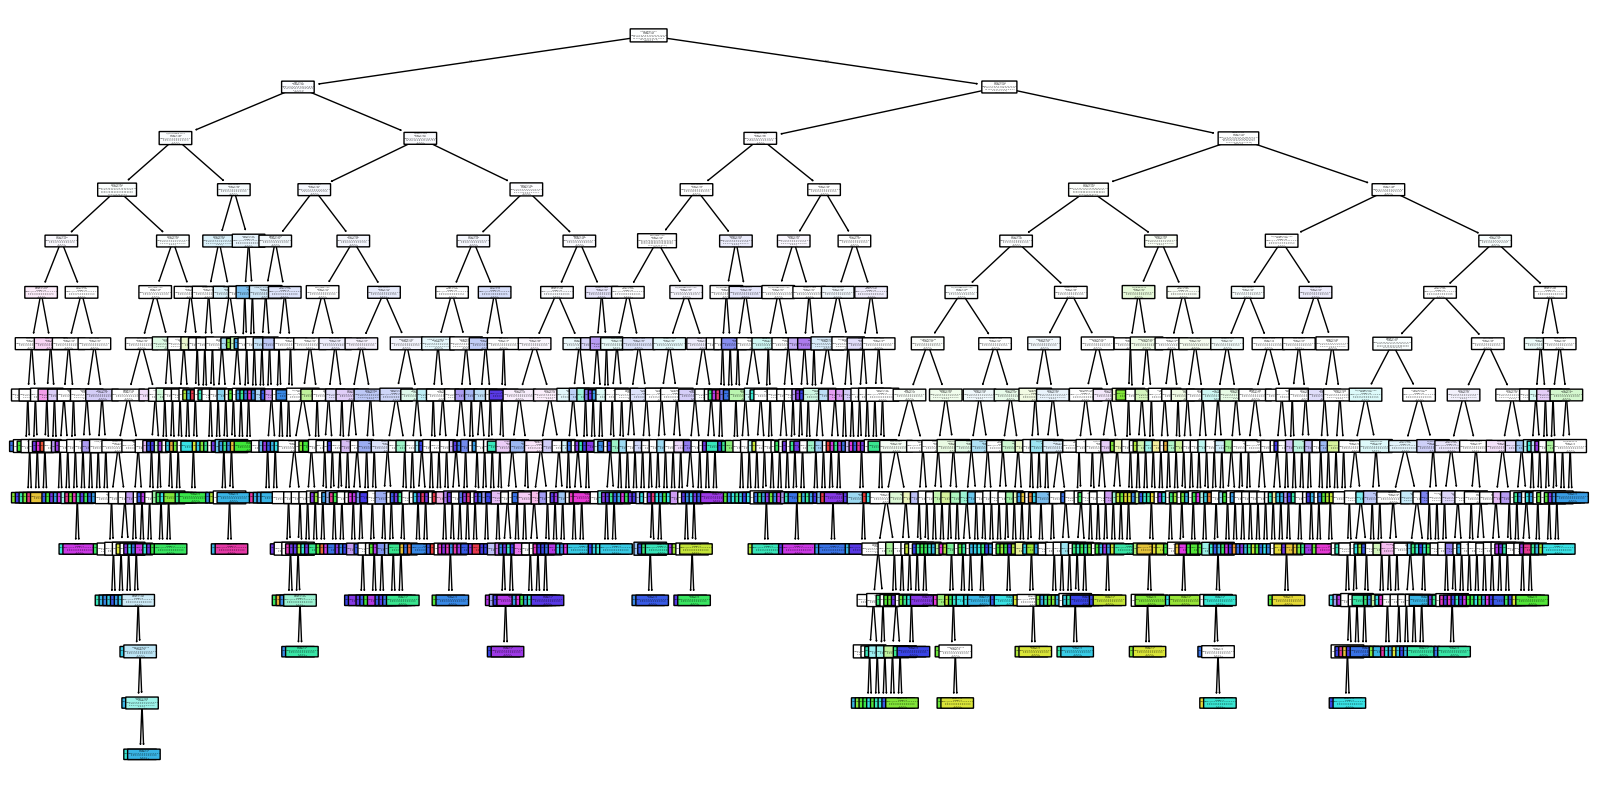

In [41]:
plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True,rounded=True,feature_names=list(features.columns),class_names=[str(cls) for cls in np.unique(target)]);
plt.show()

In [42]:
# Identify feature importance
importances = best_model.feature_importances_
importances

array([0.15905308, 0.20188214, 0.01441764, 0.21181815, 0.10242209,
       0.04735887, 0.01396206, 0.02247924, 0.02261164, 0.0054092 ,
       0.02307092, 0.01162831, 0.0333421 , 0.00213542, 0.03429514,
       0.0220431 , 0.02477649, 0.0472944 ])

In [43]:
feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
3,thalch,0.211818
1,chol,0.201882
0,trestbps,0.159053
4,oldpeak,0.102422
5,num,0.047359
17,thal_reversable defect,0.047294
14,slope_flat,0.034295
12,exang_TRUE,0.033342
16,thal_normal,0.024776
10,restecg_normal,0.023071


## Interview Questions:

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

** Decision tree models have several hyperparameters that can significantly influence their performance. Understanding these hyperparameters and their effects is crucial for building and tuning a robust decision tree model. Here are some of the most common hyperparameters:

1.max_depth – Maximum depth of the tree.
**********Limits how deep the tree can grow.
**********Helps prevent overfitting (very deep trees fit training data perfectly but generalize poorly).
2.min_samples_split – Minimum number of samples required to split an internal node.
**********Higher values prevent splits with very few samples, reducing overfitting.
**********Lower values allow the tree to grow deeper, increasing complexity.
3.min_samples_leaf – Minimum number of samples required to be at a leaf node.
**********Prevents the creation of leaves with very few samples.
**********Higher values help in smoothing the model and reduce overfitting.
4.max_features – Number of features to consider when looking for the best split.
***********In classification, the default is sqrt(total_features).
***********Reducing max_features increases diversity (helpful in ensembles) and reduces overfitting.
5.criterion – Function used to measure the quality of a split.
***********Options: gini (default), entropy (for classification), mse, friedman_mse, mae (for regression).
***********Affects how the best split is chosen during tree construction.
6.max_leaf_nodes – Maximum number of leaf nodes.
***********Limits the number of final leaf nodes to control complexity.
Summary:
Hyperparameters of decision trees control model complexity:
----Too high complexity ➔ overfitting.
----Too low complexity ➔ underfitting.
----Tuning these hyperparameters using cross-validation helps improve generalization on unseen data.

### 2. What is the difference between the Label encoding and One-hot encoding?

--Label Encoding:
****Converts categorical labels into integer values.
Pros:
Simple, uses less memory.
Useful for ordinal data (where categories have order).

Cons:
Implies an order/priority between categories that may not exist (not suitable for nominal categories).

-- One-hot Encoding:
****Converts categorical labels into binary vectors with one active bit per category.
Pros:
No ordinal relationship implied between categories.
Suitable for nominal data (unordered categories).

Cons:
Increases dimensionality (especially with many categories).
Can lead to sparse matrices.

 Aspect         Label Encoding            One-hot Encoding                   
  
 Output----------Integer values-------------Binary vectors                     
 Use case--------Ordinal categorical data----Nominal categorical data           
 Implies order---Yes-------------------------No                                 
 Memory usage----Low-------------------------High (can increase dimensionality) 
